# About the Competition

## Description
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions. Historical data are provided on 250,000 borrowers

## Evalutaion
The competition is being evaluated by the AUC which is "The Area Under the ROC curve (AUC) is an aggregated metric that evaluates how well a logistic regression model classifies positive and negative outcomes at all possible cutoffs. It can range from 0.5 to 1, and the larger it is the better"

# About the data

The **train**, **test** are the info of many people who took loan and wether they defaulted on it or not. I also contain the demographic data about them along with their loan history details. Sample **subission** file containsthe format for submitting for evaluation.

## Meta Data

| Variable   Name                      | Description                                                                                                                                                  | Type       |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                     | Person experienced 90   days past due delinquency or worse                                                                                                   | Y/N        |
| RevolvingUtilizationOfUnsecuredLines | Total   balance on credit cards and personal lines of credit except real estate and   no installment debt like car loans divided by the sum of credit limits | percentage |
| age                                  | Age of borrower in   years                                                                                                                                   | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times   borrower has been 30-59 days past due but no worse in the last 2 years.                                                                    | integer    |
| DebtRatio                            | Monthly debt   payments, alimony,living costs divided by monthy gross income                                                                                 | percentage |
| MonthlyIncome                        | Monthly income                                                                                                                                               | real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans   (installment like car loan or mortgage) and Lines of credit (e.g. credit   cards)                                                     | integer    |
| NumberOfTimes90DaysLate              | Number of times   borrower has been 90 days or more past due.                                                                                                | integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage   and real estate loans including home equity lines of credit                                                                             | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times   borrower has been 60-89 days past due but no worse in the last 2 years.                                                                    | integer    |
| NumberOfDependents                   | Number of dependents   in family excluding themselves (spouse, children etc.)                                                                                | integer    |




**Reading and understanding is he key here and that's how in this notebook i've achived relative high score with minimal effort than other notebooks in the code section of this competition. I've seen so complex notebooks and when i was starting i felt over-whelmed byt the effort those guys put into to achieve great accuracy. I'll walkthorugh my thought process futher down the notebook but for now read and understand the metadata carefully and understand the business probelem. Also, remember than not all complex models will yield better results. its the understand the underlying business problem.**

# Importing Libraries, Loading Data and Setting Aesthetics

In [31]:
#i'm Gonna import just the basic libraies necessary to start the analysis. Then i'll import whatever i need on the go
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 120) #to remove the limit of columns shows as output

# Importing Necessary libraies for viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# This is just some asthetics settings for plots before we start EDA
pd.set_option('display.max_columns', None) #Enable to show max columns in code cells
sns.set_style('darkgrid') #set sns plot background
matplotlib.rcParams['font.size'] = 14 #set the deafult plot font size for this notebook
matplotlib.rcParams['figure.figsize'] = (10, 6) #set the deafult plot size for this notebook
matplotlib.rcParams['figure.facecolor'] = '#00000000' #set matplotlib plot background
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [32]:
train=pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
test=pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv')
submission=pd.read_csv('/kaggle/input/GiveMeSomeCredit/sampleEntry.csv')

# Overviewing Data and Missing Values

In [33]:
train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766,45,2,0.803,9120.000,13,0,6,0,2.000
1,2,0,0.957,40,0,0.122,2600.000,4,0,0,0,1.000
2,3,0,0.658,38,1,0.085,3042.000,2,1,0,0,0.000
3,4,0,0.234,30,0,0.036,3300.000,5,0,0,0,0.000
4,5,0,0.907,49,1,0.025,63588.000,7,0,1,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.041,74,0,0.225,2100.000,4,0,1,0,0.000
149996,149997,0,0.300,44,0,0.717,5584.000,4,0,1,0,2.000
149997,149998,0,0.246,58,0,3870.000,NaN,18,0,1,0,0.000
149998,149999,0,0.000,30,0,0.000,5716.000,4,0,0,0,0.000


In [34]:
test

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.886,43,0,0.178,5700.000,4,0,0,0,0.000
1,2,NaN,0.463,57,0,0.527,9141.000,15,0,4,0,2.000
2,3,NaN,0.043,59,0,0.688,5083.000,12,0,1,0,2.000
3,4,NaN,0.280,38,1,0.926,3200.000,7,0,2,0,0.000
4,5,NaN,1.000,27,0,0.020,3865.000,4,0,0,0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.283,24,0,0.069,1400.000,5,0,0,0,0.000
101499,101500,NaN,0.922,36,3,0.934,7615.000,8,0,2,0,4.000
101500,101501,NaN,0.082,70,0,836.000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335,56,0,3568.000,NaN,8,0,2,1,3.000


In [35]:
submission

,Id,Probability
0,1,0.081
1,2,0.041
2,3,0.012
3,4,0.068
4,5,0.108
...,...,...
101498,101499,0.045
101499,101500,0.344
101500,101501,0.007
101501,101502,0.122


Looking at the submission file we can see that we have to submit the model's probabilities and not the logistic i.e Y/N. This will be a very great metric to evaluate the model rather than just 'Yes' or 'No'

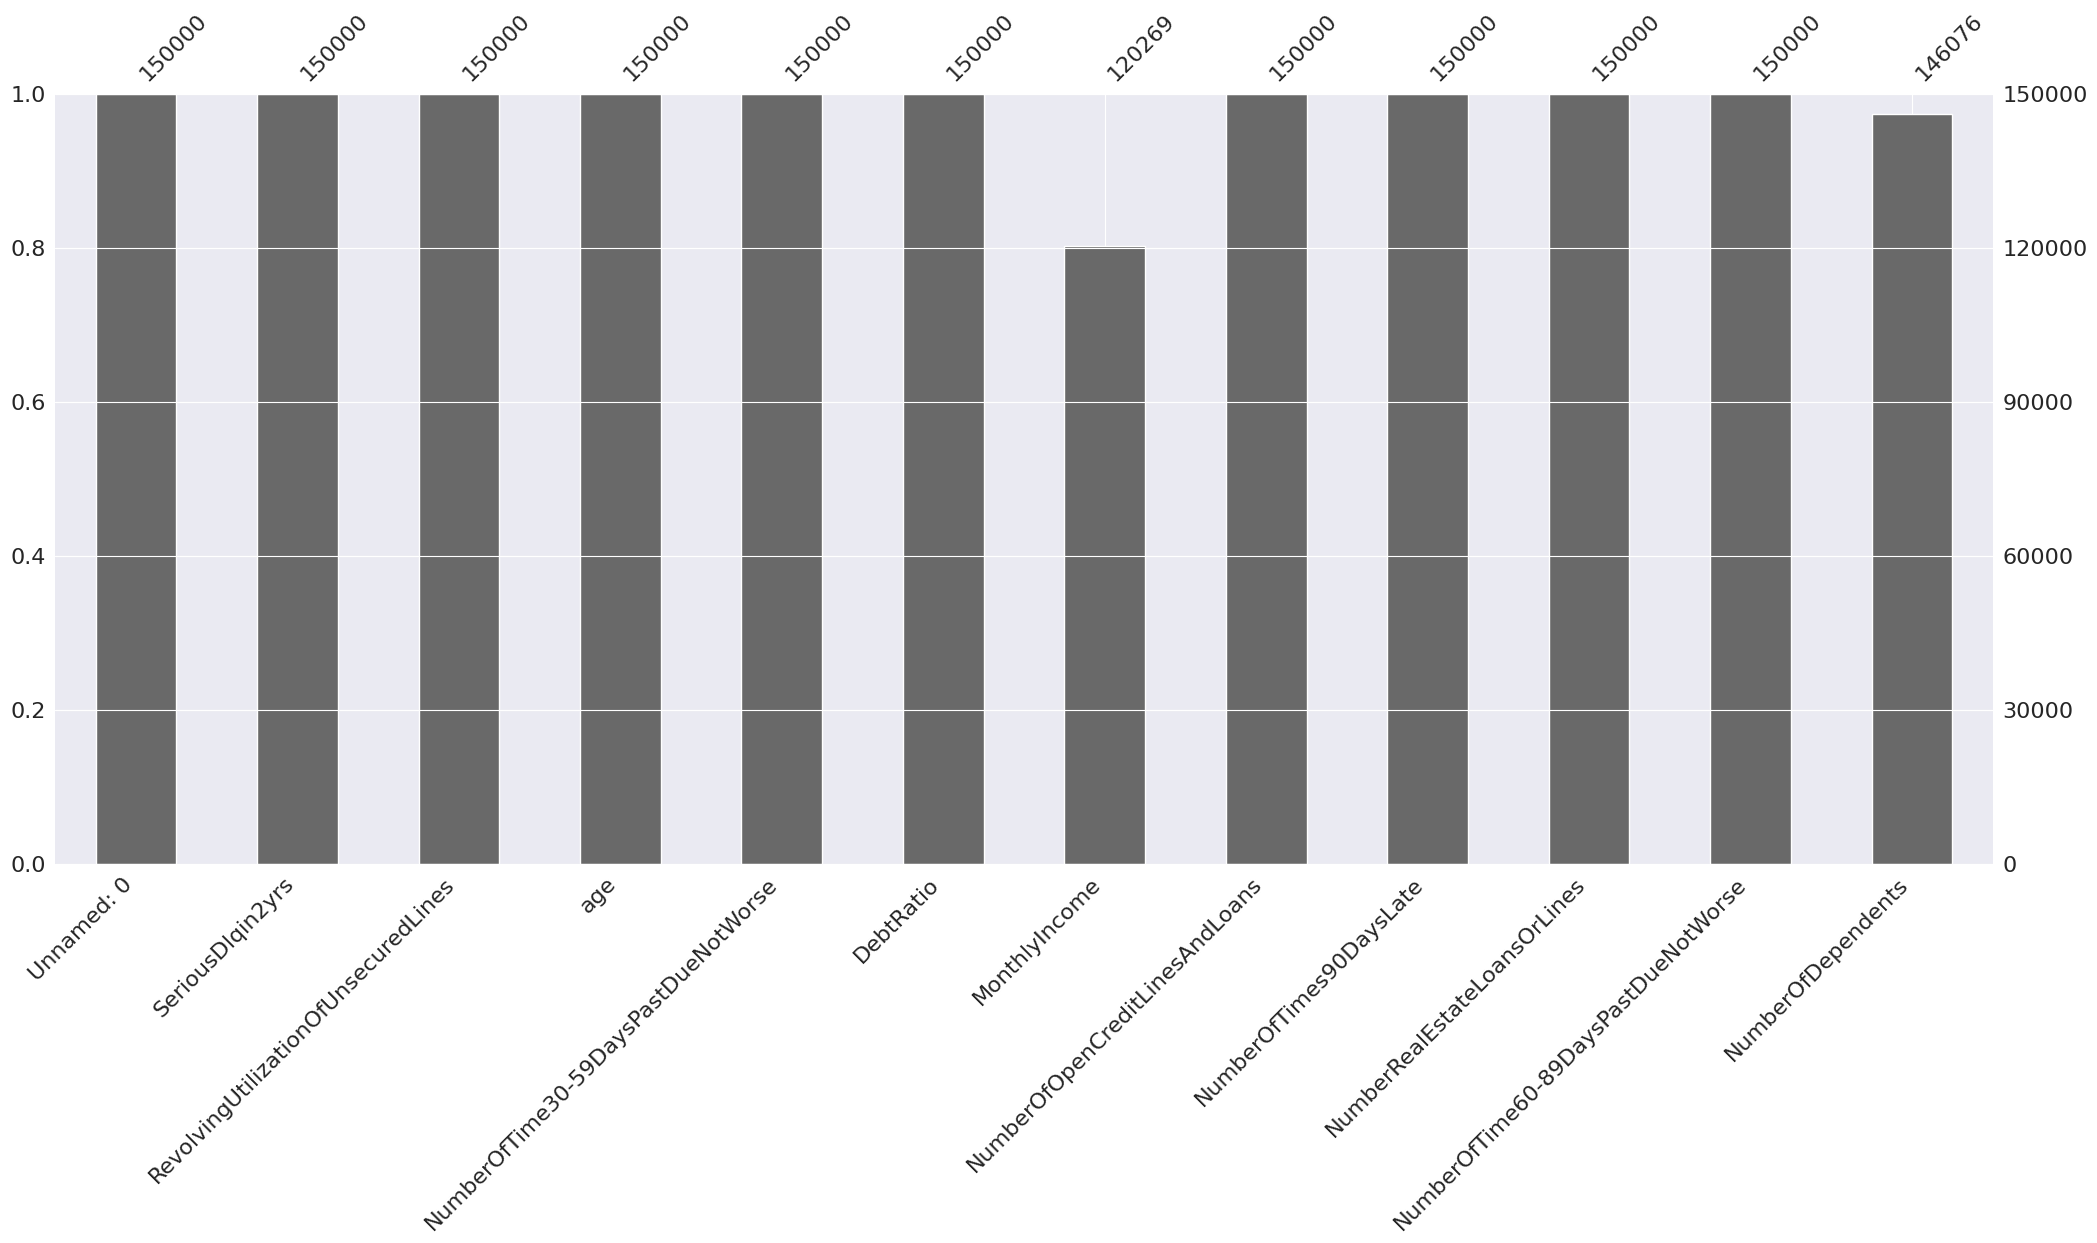

In [36]:
import missingno as msno

msno.bar(train);

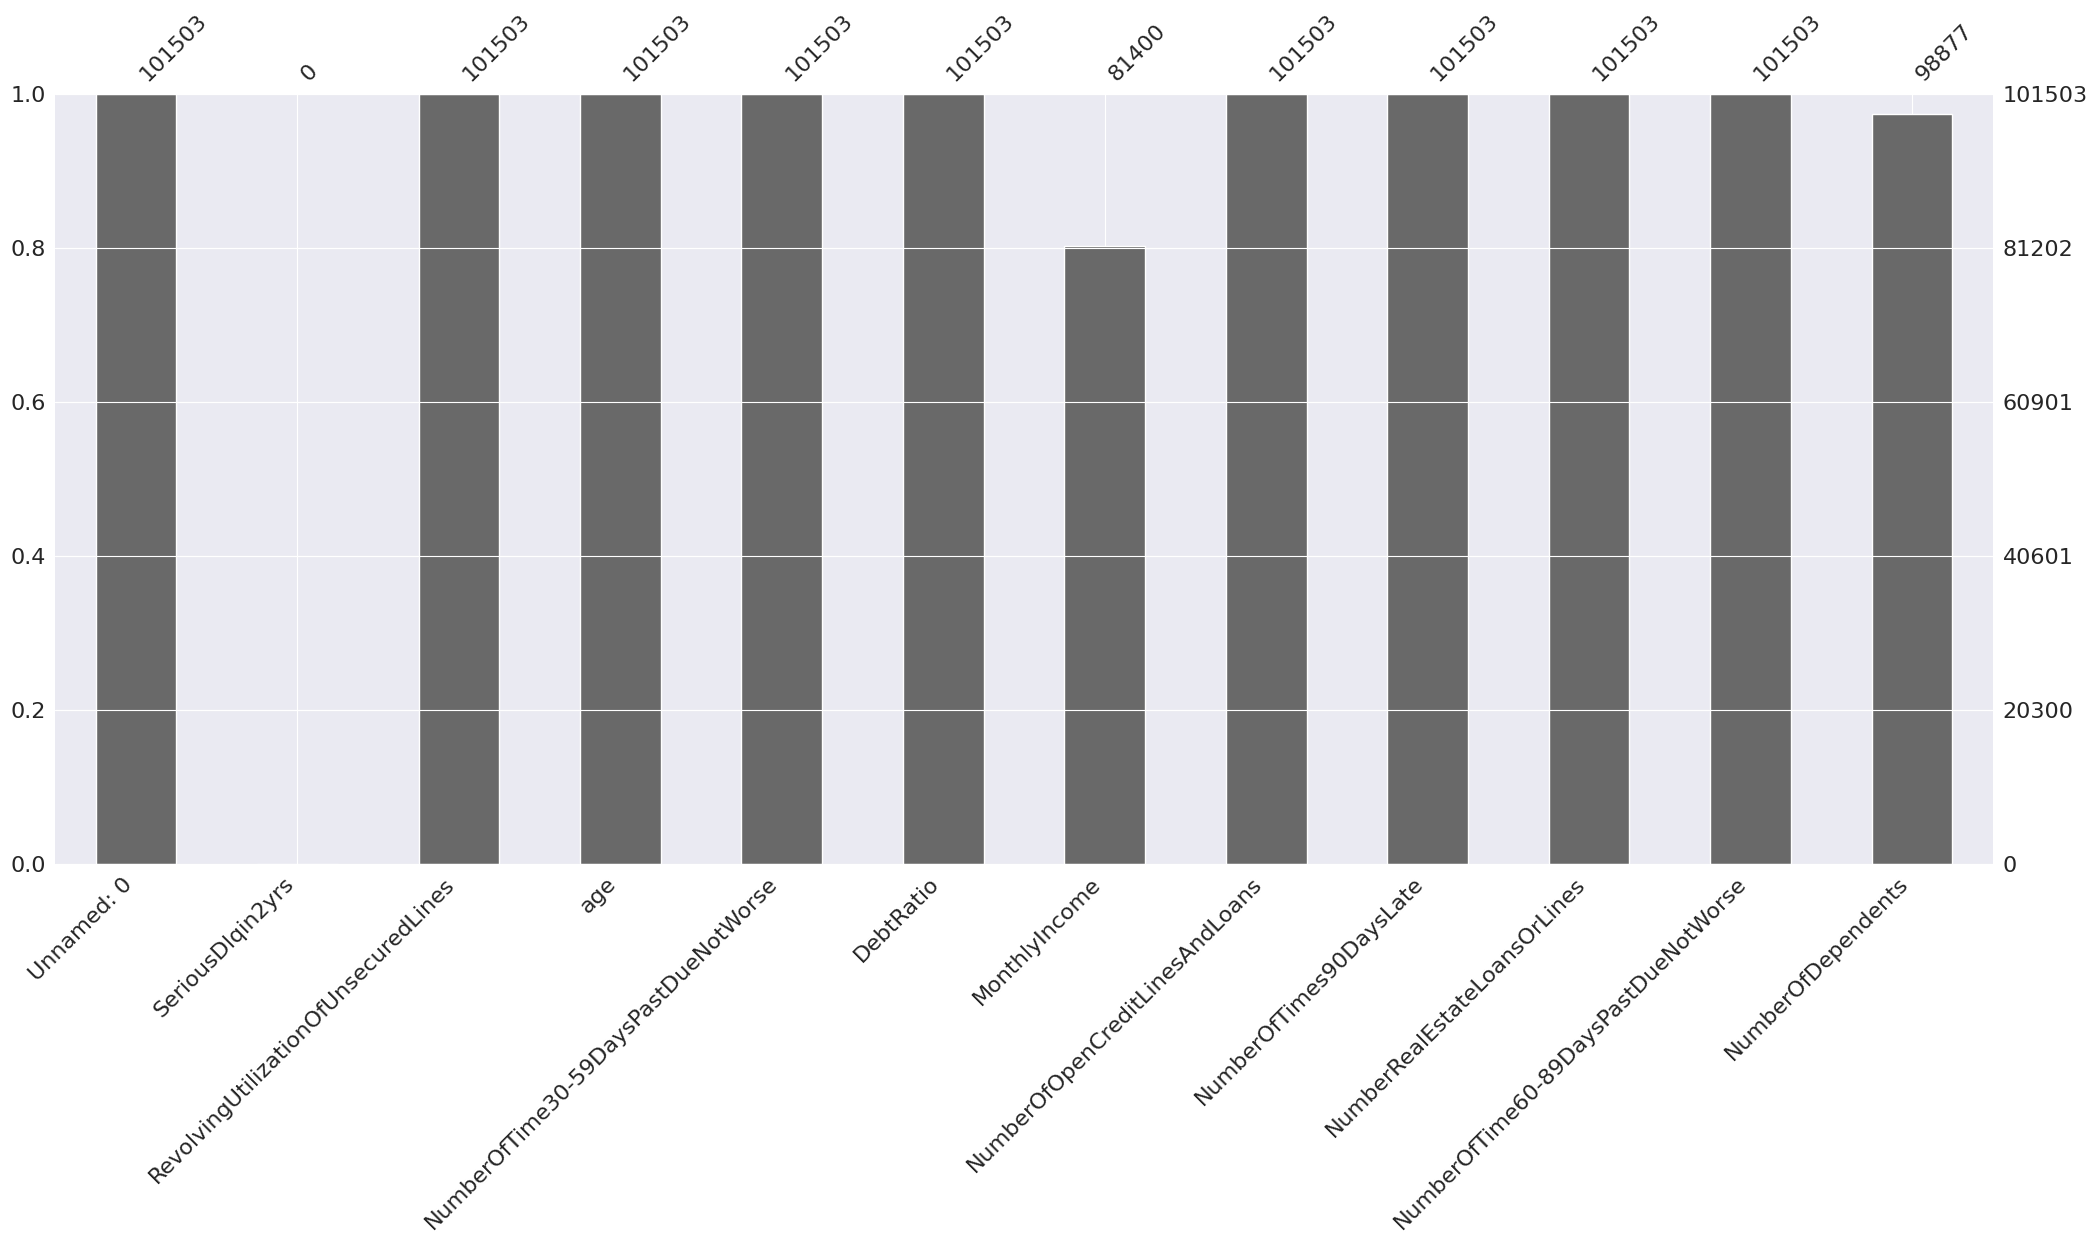

In [38]:
msno.bar(test);

# Initial Impressions

* the column named 'Unnamed: 0' needs to be removed. it seems like useless id column
* few columns like 'MonthlyIncome' and 'NumberOfDependents' haviing missing values
* i have to predict 'SeriousDlqin2yrs' and put the probability in the submmission dataset.
* this is a clasification problem so have to use logictic regression,random forest,xgboost classifier etc
* the datatypes seems to correct for all the columns.
* let's do with EDA to learn more about the dataset.

# Understanding Data Distribution Using Descriptive Statistics

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [40]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000,150000.000,150000.000,150000.000,150000.000,150000.000,120269.000,150000.000,150000.000,150000.000,150000.000,146076.000
mean,75000.500,0.067,6.048,52.295,0.421,353.005,6670.221,8.453,0.266,1.018,0.240,0.757
std,43301.415,0.250,249.755,14.772,4.193,2037.819,14384.674,5.146,4.169,1.130,4.155,1.115
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,37500.750,0.000,0.030,41.000,0.000,0.175,3400.000,5.000,0.000,0.000,0.000,0.000
50%,75000.500,0.000,0.154,52.000,0.000,0.367,5400.000,8.000,0.000,1.000,0.000,0.000
75%,112500.250,0.000,0.559,63.000,0.000,0.868,8249.000,11.000,0.000,2.000,0.000,1.000
max,150000.000,1.000,50708.000,109.000,98.000,329664.000,3008750.000,58.000,98.000,54.000,98.000,20.000


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            101503 non-null  int64  
 1   SeriousDlqin2yrs                      0 non-null       float64
 2   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 3   age                                   101503 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 5   DebtRatio                             101503 non-null  float64
 6   MonthlyIncome                         81400 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 8   NumberOfTimes90DaysLate               101503 non-null  int64  
 9   NumberRealEstateLoansOrLines          101503 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 11  

In [42]:
test.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000,0.000,101503.000,101503.000,101503.000,101503.000,81400.000,101503.000,101503.000,101503.000,101503.000,98877.000
mean,50752.000,NaN,5.310,52.405,0.454,344.475,6855.036,8.454,0.297,1.013,0.270,0.769
std,29301.537,NaN,196.156,14.780,4.538,1632.595,36508.600,5.144,4.516,1.110,4.504,1.137
min,1.000,NaN,0.000,21.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,25376.500,NaN,0.030,41.000,0.000,0.173,3408.000,5.000,0.000,0.000,0.000,0.000
50%,50752.000,NaN,0.153,52.000,0.000,0.364,5400.000,8.000,0.000,1.000,0.000,0.000
75%,76127.500,NaN,0.564,63.000,0.000,0.852,8200.000,11.000,0.000,2.000,0.000,1.000
max,101503.000,NaN,21821.000,104.000,98.000,268326.000,7727000.000,85.000,98.000,37.000,98.000,43.000


**We'll just observe the data there are so much of outliers and absurd data that i'll explain one by one below in the EDA section. The understanding of he business problems starts here and understanding all these is the key. Once you understood this then it'll be very useful in building a model with great accuracy.**

# Exploratory Data Analysis

Let's visualize the relation between the variables through some plots. Then we'll talk about the outliers and other data descripencies in detail later.

## Revolving Utilization Of Unsecured Lines

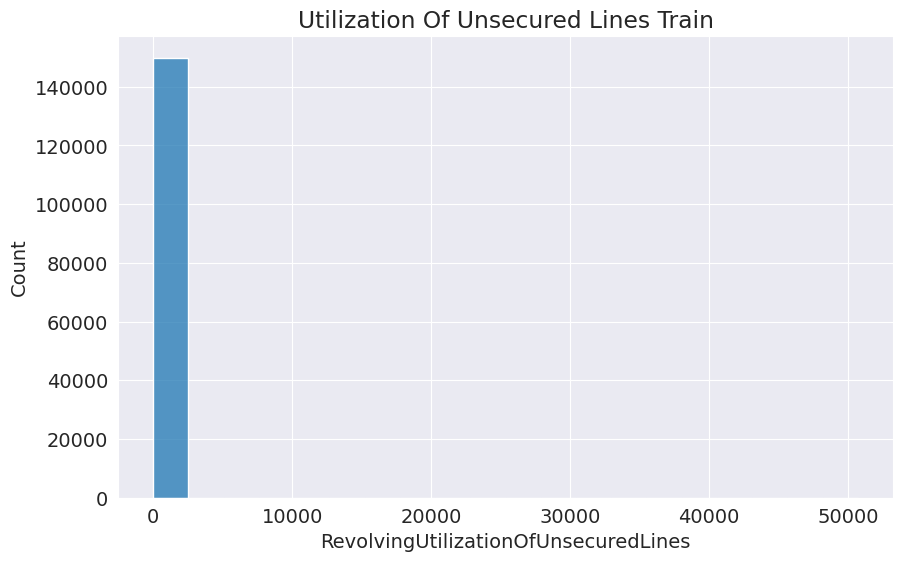

In [51]:
sns.histplot(data=train, x='RevolvingUtilizationOfUnsecuredLines', bins=20)
plt.title('Utilization Of Unsecured Lines Train')
plt.show()

In [52]:
train['RevolvingUtilizationOfUnsecuredLines'].describe()

count   150000.000
mean         6.048
std        249.755
min          0.000
25%          0.030
50%          0.154
75%          0.559
max      50708.000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

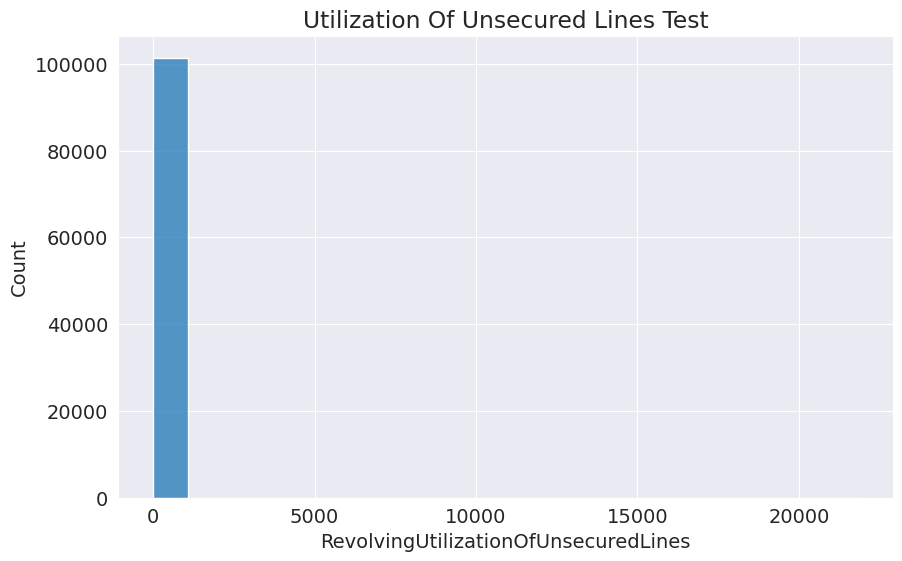

In [53]:
sns.histplot(data=test, x='RevolvingUtilizationOfUnsecuredLines', bins=20)
plt.title('Utilization Of Unsecured Lines Test')
plt.show()

In [54]:
test['RevolvingUtilizationOfUnsecuredLines'].describe()

count   101503.000
mean         5.310
std        196.156
min          0.000
25%          0.030
50%          0.153
75%          0.564
max      21821.000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

***`RevolvingUtilizationOfUnsecuredLines` this seems weird too. as per the description it said the total balance to the sum of available credit limits. Well, if u think the credit limit should be the greater number as that is the maximum a person caan spend. For example if the credit limit is 100 and the person spends 70 then the utilisation will be 0.7. Thus the utilisation will be under 1 unless the person spends utilises all the available credit then it'll be 1 but it can't exceed 1. you can say the person can be spending from his savings and that would result the utilisation being more than 1. Yes, it can be true but the banks will not have access to the spending from his savings. If somehow they coul track then the data here seems reasonable to some extent. cause an utilisation of `50708` is 50000 times the available credit limit which can't be possible and if that's true then that person has some serious financial probelms that he will default on any loan for sure the probability is 100%. I see these kind of values as outliers as from the stats above 75% of the values lie below 1. I could have filtered it but see the `test` dataset its the same here too `21821` utilisation. Thus, if i would have filtered it then the model will not get trained for these kind of scenarios. Also i can't filter the test dataset. But in real life these could hve been some data entry error or some serious cases that would need special attention.***

----------------------------------------------------------------------------------------------------------------------------------------------------------

## Age

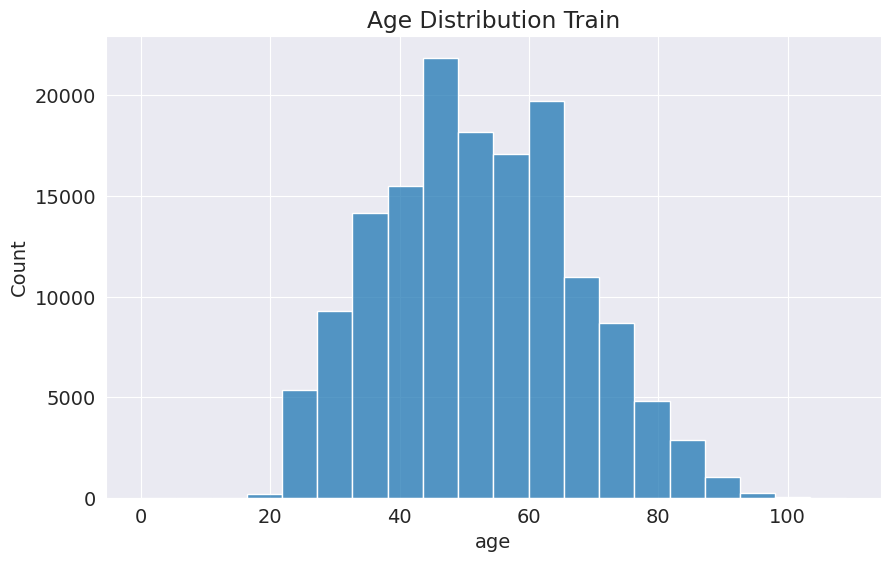

In [43]:
# Histogram
sns.histplot(data=train, x='age', bins=20)
plt.title('Age Distribution Train')
plt.show()

In [44]:
train['age'].describe()

count   150000.000
mean        52.295
std         14.772
min          0.000
25%         41.000
50%         52.000
75%         63.000
max        109.000
Name: age, dtype: float64

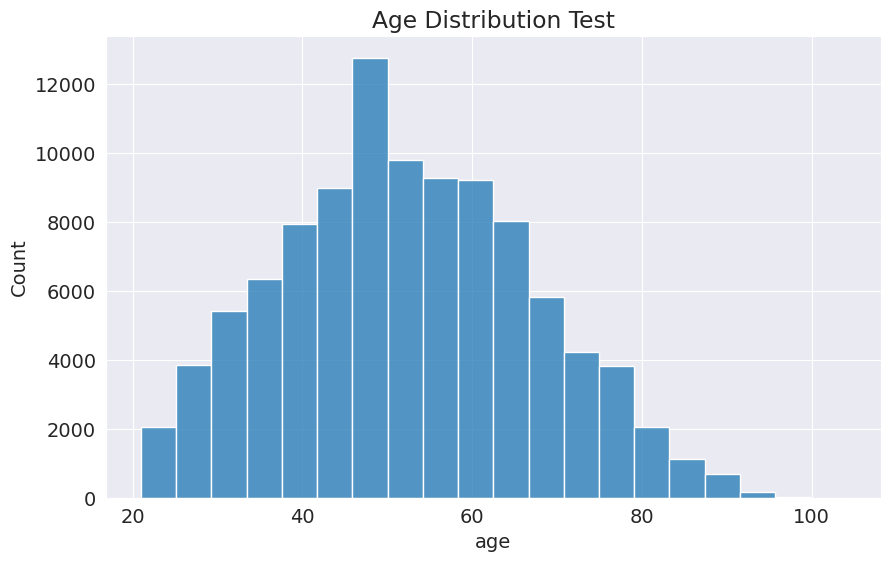

In [46]:
# Histogram
sns.histplot(data=test, x='age', bins=20)
plt.title('Age Distribution Test')
plt.show()

In [47]:
test['age'].describe()

count   101503.000
mean        52.405
std         14.780
min         21.000
25%         41.000
50%         52.000
75%         63.000
max        104.000
Name: age, dtype: float64

***we seems to have a normal distribution except some outliers. we have a min age of `0` in the train data which is absurd also that was the only one value in the dataset. so i checked the min age on the test datset, where it is starting at 21. so that's the min age for these loans. cant much say about the max age. since in train dataset its `109` and in test its `104` so its better to leave as it is rather than setting an threshold.***

----------------------------------------------------------------------------------------------------------------------------------------------------------

## NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate

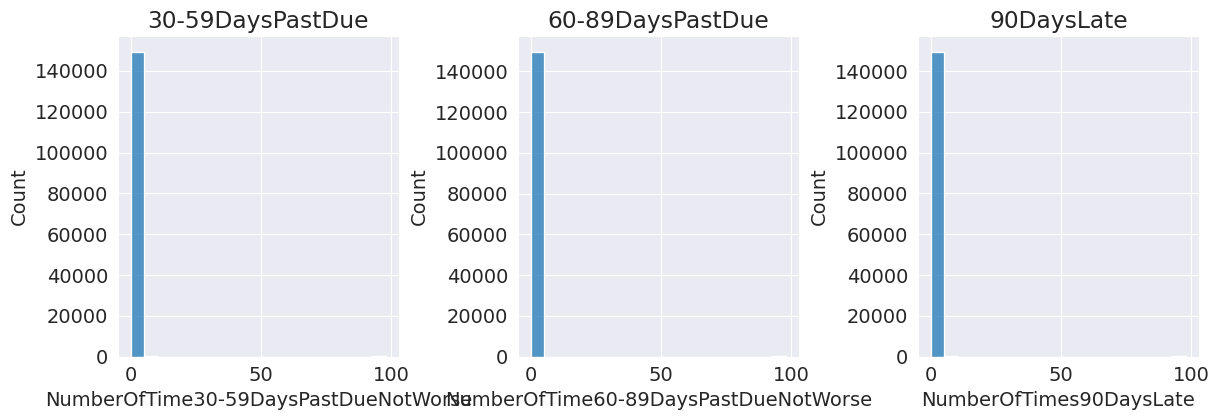

In [60]:
# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot column A
sns.histplot(data=train, x='NumberOfTime30-59DaysPastDueNotWorse', ax=axs[0])
axs[0].set_title('30-59DaysPastDue')

# Plot column B
sns.histplot(data=train, x='NumberOfTime60-89DaysPastDueNotWorse', ax=axs[1])
axs[1].set_title('60-89DaysPastDue')

# Plot column C
sns.histplot(data=train, x='NumberOfTimes90DaysLate', ax=axs[2])
axs[2].set_title('90DaysLate')

# Adjust spacing between subplots
plt.tight_layout(pad=0)

# Display the plots
plt.show()

In [66]:
train[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,150000.000,150000.000,150000.000
mean,0.421,0.240,0.266
std,4.193,4.155,4.169
min,0.000,0.000,0.000
25%,0.000,0.000,0.000
50%,0.000,0.000,0.000
75%,0.000,0.000,0.000
max,98.000,98.000,98.000


In [67]:
train[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']].corr()*100

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
NumberOfTime30-59DaysPastDueNotWorse,100.000,98.701,98.360
NumberOfTime60-89DaysPastDueNotWorse,98.701,100.000,99.280
NumberOfTimes90DaysLate,98.360,99.280,100.000


In [75]:
## Loan default distribution when people are late on their dues
train['SeriousDlqin2yrs'][(train['NumberOfTime30-59DaysPastDueNotWorse'] == 98) & 
                          (train['NumberOfTime60-89DaysPastDueNotWorse'] == 98) & (
                              train['NumberOfTimes90DaysLate'] == 98)].value_counts()

1    143
0    121
Name: SeriousDlqin2yrs, dtype: int64

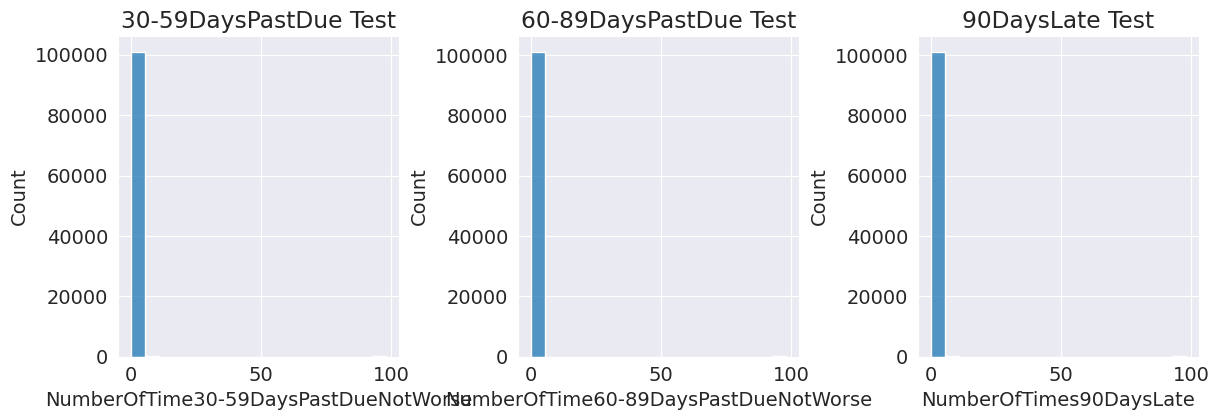

In [68]:
# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Plot column A
sns.histplot(data=test, x='NumberOfTime30-59DaysPastDueNotWorse', ax=axs[0])
axs[0].set_title('30-59DaysPastDue Test')

# Plot column B
sns.histplot(data=test, x='NumberOfTime60-89DaysPastDueNotWorse', ax=axs[1])
axs[1].set_title('60-89DaysPastDue Test')

# Plot column C
sns.histplot(data=test, x='NumberOfTimes90DaysLate', ax=axs[2])
axs[2].set_title('90DaysLate Test')

# Adjust spacing between subplots
plt.tight_layout(pad=0)

# Display the plots
plt.show()

In [70]:
test[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,101503.000,101503.000,101503.000
mean,0.454,0.270,0.297
std,4.538,4.504,4.516
min,0.000,0.000,0.000
25%,0.000,0.000,0.000
50%,0.000,0.000,0.000
75%,0.000,0.000,0.000
max,98.000,98.000,98.000


In [69]:
test[['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']].corr()*100

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
NumberOfTime30-59DaysPastDueNotWorse,100.000,98.880,98.568
NumberOfTime60-89DaysPastDueNotWorse,98.880,100.000,99.411
NumberOfTimes90DaysLate,98.568,99.411,100.000


***`NumberOfTime30-59DaysPastDueNotWorse`,`NumberOfTimes90DaysLate`,`NumberOfTime60-89DaysPastDueNotWorse` these columns are just a single feature that has been split into multiple sections of the timeline. Thus can see the very similar distribution of data and very high coorealtion. Thatt's being aid this also filled with outliers cause see 75% of the data is still 0 while the max of each column is 98. Again i cant filter the data as we can see a similar trend in the test dataset. we can see from the loan default distribution on the train above on the late condition there are `121` instances that people didn't default on loans even they are 98 times late while `149` instances where people defaulted on loan after being 98 times late. This is a 50/50 situation that can't be concluded eitherway according to the dataset. But In real-life though if a person is going to be late by 98 times then there a 100% or close to 100% probability that he will default on the loan.***

----------------------------------------------------------------------------------------------------------------------------------------------------------

## DebtRatio

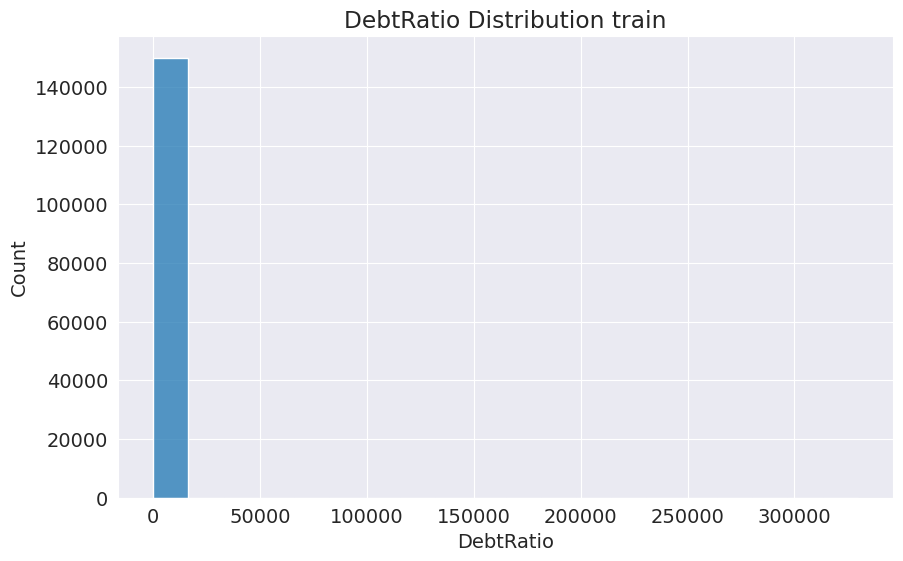

In [77]:
# Histogram
sns.histplot(data=train, x='DebtRatio', bins=20)
plt.title('DebtRatio Distribution train')
plt.show()

In [78]:
train['DebtRatio'].describe()

count   150000.000
mean       353.005
std       2037.819
min          0.000
25%          0.175
50%          0.367
75%          0.868
max     329664.000
Name: DebtRatio, dtype: float64

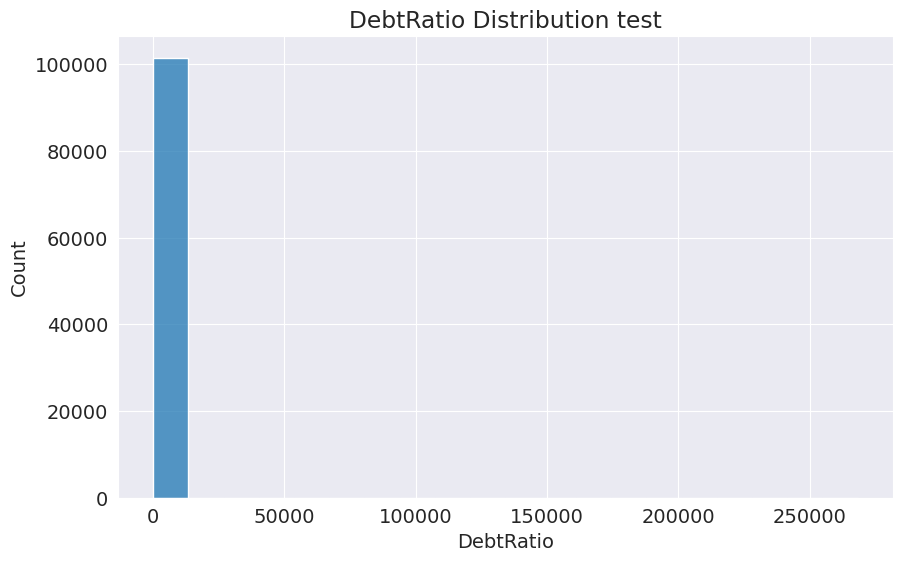

In [81]:
# Histogram
sns.histplot(data=test, x='DebtRatio', bins=20)
plt.title('DebtRatio Distribution test')
plt.show()

In [82]:
test['DebtRatio'].describe()

count   101503.000
mean       344.475
std       1632.595
min          0.000
25%          0.173
50%          0.364
75%          0.852
max     268326.000
Name: DebtRatio, dtype: float64

Another controversial column is `DebtRatio` the description says _Monthly debt payments, alimony,living costs divided by monthy gross income_. This is so similar to the utilisation we saw above. For example if the income is 100 and the monthly spends is 70 then the DebtRatio will be 0.7. Thus the utilisation will be under 1 unless the person have so much dept then it'll be 1 but it can't exceed 1 if it exceeds one then that person is in very bad financial situation and he'll surely default on the given loan with a probability of 100%. Idealy the monthly income should be more than the monthly spending and that's what's true to the 75% of the dataset which is under 1 while the max in the `train` data is `329664` which is impossible cause _that's 3.3 lakhs times higher than the monthly income_. Again i could filter this out as an outlier but see the stats of `test` data its same story there too, since i can't filter the test dataset i'm gonna train the model on these absured conditions so that it will know that these are absured conditions and act accordinly. this gets even wilder in the next column `MonthlyIncome` read down below.

## Monthly Income

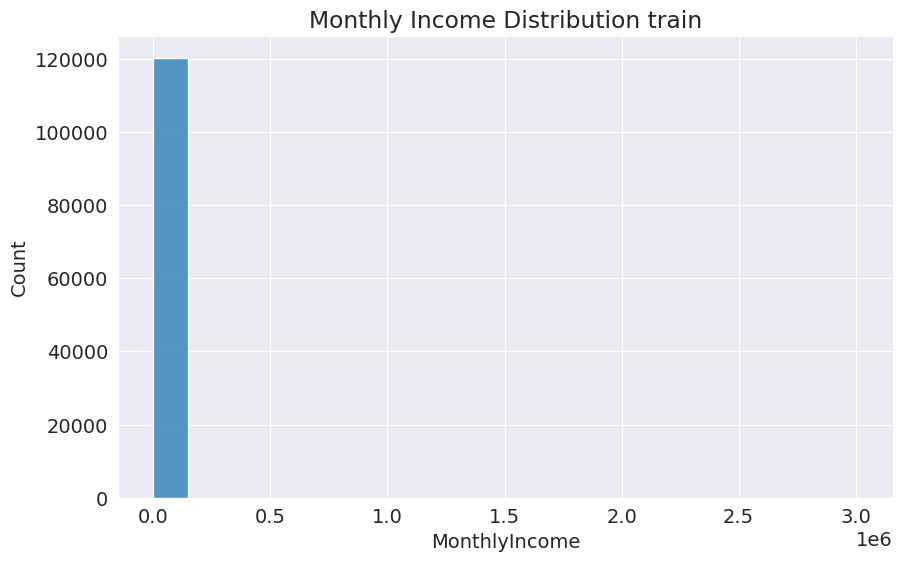

In [83]:
# Histogram
sns.histplot(data=train, x='MonthlyIncome', bins=20)
plt.title('Monthly Income Distribution train')
plt.show()

In [85]:
train['MonthlyIncome'].describe()

count    120269.000
mean       6670.221
std       14384.674
min           0.000
25%        3400.000
50%        5400.000
75%        8249.000
max     3008750.000
Name: MonthlyIncome, dtype: float64

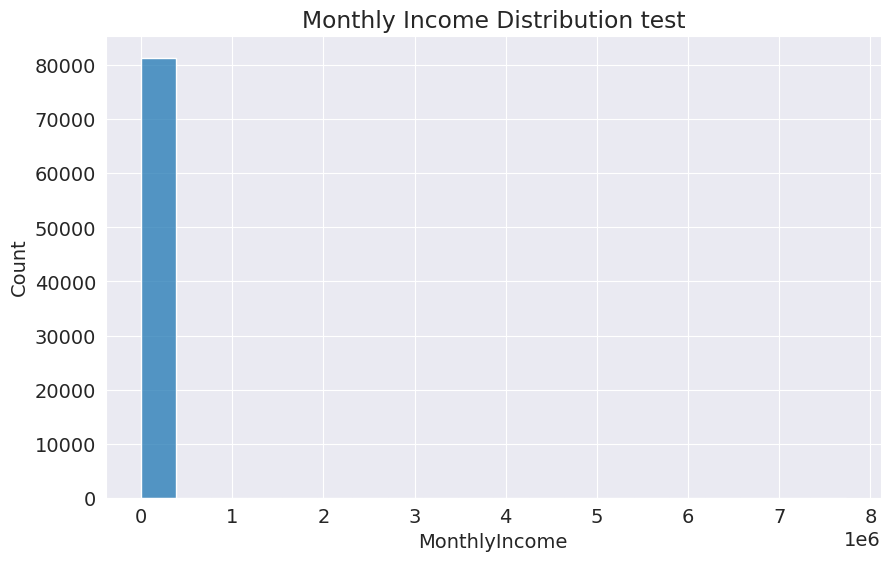

In [84]:
# Histogram
sns.histplot(data=test, x='MonthlyIncome', bins=20)
plt.title('Monthly Income Distribution test')
plt.show()

In [86]:
test['MonthlyIncome'].describe()

count     81400.000
mean       6855.036
std       36508.600
min           0.000
25%        3408.000
50%        5400.000
75%        8200.000
max     7727000.000
Name: MonthlyIncome, dtype: float64

Talking about MonthlyIncome then that data is another nightmare. we can see the min income is **0** that's not possible at all and how a bank will give loan to a person having zero monthly income? the max value is 3008750 which is 3million, who in the world with a monthly income of 3million and still needs a loan? okay maybe we'll consider as a businessman but 75% of the monthly income in the dataset remains under 10K so, i filtered the dataset for income above **`1lakh`

In [89]:
train[['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome']][(train['MonthlyIncome'] >100000)]

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome
266,0.008,0.010,208333.000
3427,0.405,0.038,110775.000
4043,0.007,0.000,203500.000
7107,0.177,0.021,142000.000
17373,1.000,0.004,251608.000
...,...,...,...
136879,0.471,0.109,127400.000
137140,0.000,0.003,1794060.000
137426,0.080,0.002,562466.000
138631,0.408,0.047,107400.000


This seems reasonable as their `DebtRatio` and `RevolvingUtilizationOfUnsecuredLines` seems normal but we do have those abnormal cases as well. so i checked for those as well using the conditions that `DebtRatio` and `RevolvingUtilizationOfUnsecuredLines` higher than **1** and very high 'MonthlyIncome' to a relief we don't seem to have this kind of complication.

In [92]:
train[['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome']][(train['MonthlyIncome'] >100000) & 
                                                                            (train['DebtRatio'] >1) & 
                                                                           (train['RevolvingUtilizationOfUnsecuredLines'] >1)]

,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome


but **Surprise, Surprise** we have another condition where the `DebtRatio` seems so high but the `MonthlyIncome` is missing and it like someone accidentaly put the monthly income in the debtratio colum. wait i'll show u waht i mean.

In [97]:
train[train['MonthlyIncome'].isnull()]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,7,0,0.306,57,0,5710.000,NaN,8,0,3,0,0.000
8,9,0,0.117,27,0,46.000,NaN,2,0,0,0,NaN
16,17,0,0.061,78,0,2058.000,NaN,10,0,2,0,0.000
32,33,0,0.083,62,0,977.000,NaN,6,0,1,0,0.000
41,42,0,0.073,81,0,75.000,NaN,7,0,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
149976,149977,0,0.001,76,0,60.000,NaN,5,0,0,0,0.000
149977,149978,0,0.236,29,0,349.000,NaN,3,0,0,0,0.000
149984,149985,0,0.038,84,0,25.000,NaN,5,0,0,0,0.000
149992,149993,0,0.872,50,0,4132.000,NaN,11,0,1,0,3.000


but again this is not completely true cause i found  𝑁𝐴𝑁 even when the DebtRatio is below 1. found that using the below filtered dataset.

In [98]:
train[(train['DebtRatio'] < 1) & (train['MonthlyIncome'].isna())]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
52,53,0,1.000,62,0,0.000,NaN,1,0,0,0,0.000
238,239,0,1.000,28,0,0.000,NaN,0,0,0,0,NaN
331,332,0,1.000,29,0,0.000,NaN,0,0,0,0,0.000
395,396,0,0.001,83,0,0.000,NaN,4,0,0,0,0.000
509,510,0,1.000,91,0,0.000,NaN,3,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
149622,149623,0,1.000,46,0,0.000,NaN,0,1,0,0,0.000
149666,149667,0,1.000,59,0,0.000,NaN,2,0,0,0,0.000
149769,149770,0,1.000,23,98,0.000,NaN,0,98,0,98,NaN
149853,149854,0,0.000,68,1,0.000,NaN,4,0,0,0,0.000


***To simply put i couln't arrive at an realationship between `DebtRatio` and `MonthlyIncome` this worsen with the missing data and the same trend follows in the test dataset too. Thus i'm im leaving these ulaltered for the ML model to learn these anmolies for better predictions.***

## Number Of Open Credit Lines And Loans

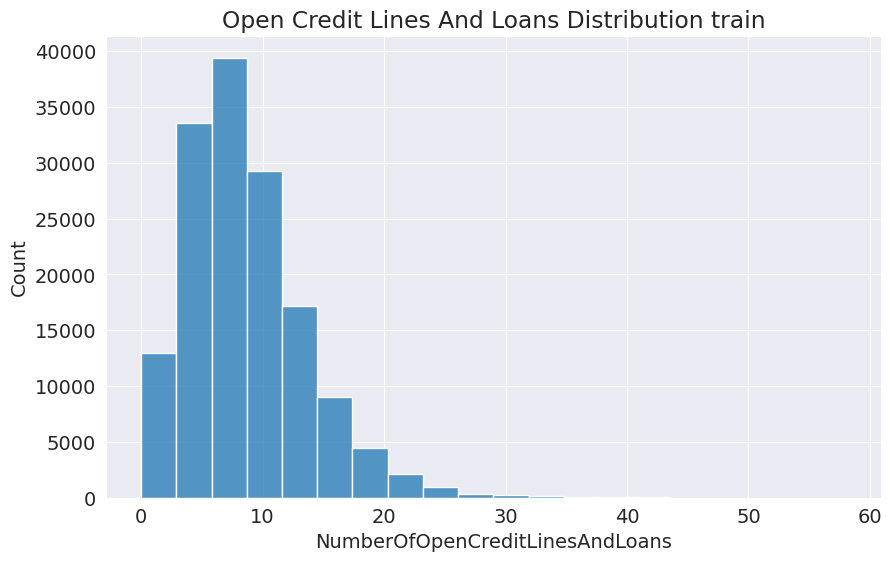

In [100]:
# Histogram
sns.histplot(data=train, x='NumberOfOpenCreditLinesAndLoans', bins=20)
plt.title('Open Credit Lines And Loans Distribution train')
plt.show()

In [102]:
train['NumberOfOpenCreditLinesAndLoans'].describe()

count   150000.000
mean         8.453
std          5.146
min          0.000
25%          5.000
50%          8.000
75%         11.000
max         58.000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

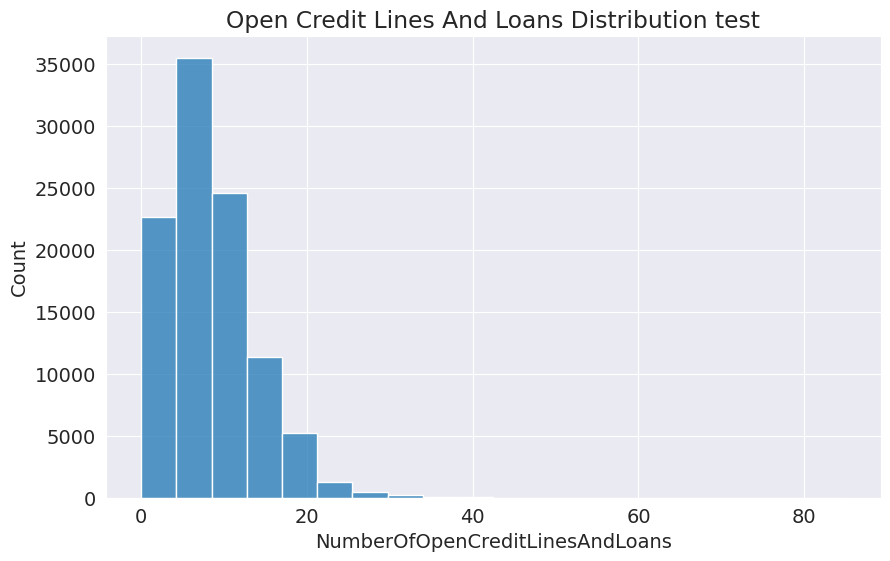

In [101]:
# Histogram
sns.histplot(data=test, x='NumberOfOpenCreditLinesAndLoans', bins=20)
plt.title('Open Credit Lines And Loans Distribution test')
plt.show()

In [103]:
test['train['NumberOfOpenCreditLinesAndLoans'].describe()'].describe()

count   101503.000
mean         8.454
std          5.144
min          0.000
25%          5.000
50%          8.000
75%         11.000
max         85.000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

As per the description 'Number Of Open Credit Lines And Loans' means _Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)_. Looking at the distribution both train and test sets have identical distribution with same kind of outliers. people are having `58` in that i dont know how much are source of income and how much are the loans. In reallife a detailed investigation will be required in these kind of cases and if not enough info is obtained then banks wont give loans as the probability of defaulting is very high. But if they have good `MonthlyIncome` then this can be possible. so we'll look at that now.

In [105]:
train[(train['NumberOfOpenCreditLinesAndLoans'] > 11)].sort_values(by='NumberOfOpenCreditLinesAndLoans',ascending=False)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
30587,30588,0,0.003,53,0,5.968,8000.000,58,0,54,0,0.000
137095,137096,1,0.051,42,0,0.101,42156.000,57,0,1,0,2.000
22683,22684,0,0.020,51,0,0.032,3600.000,57,0,0,0,0.000
51026,51027,0,0.020,70,0,0.075,8900.000,56,0,0,0,2.000
107427,107428,0,0.013,48,0,0.025,7373.000,56,0,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
77596,77597,0,0.544,28,1,540.000,NaN,12,0,0,0,0.000
77612,77613,0,0.031,67,0,3937.000,NaN,12,0,3,0,0.000
77614,77615,0,0.510,64,1,0.236,6633.000,12,0,0,0,2.000
77647,77648,0,0.490,42,3,0.578,6860.000,12,0,2,0,1.000


***we can see that people having `MonthlyIncome` less than 10k still having many sources of other income and loans and still managed not to default on the loan. As i said before this is `not enough data` situation and since the test data follows a similar pattern again i wont filter the train data and leave it to the model to train and figure it out.***

## Number Of Dependents

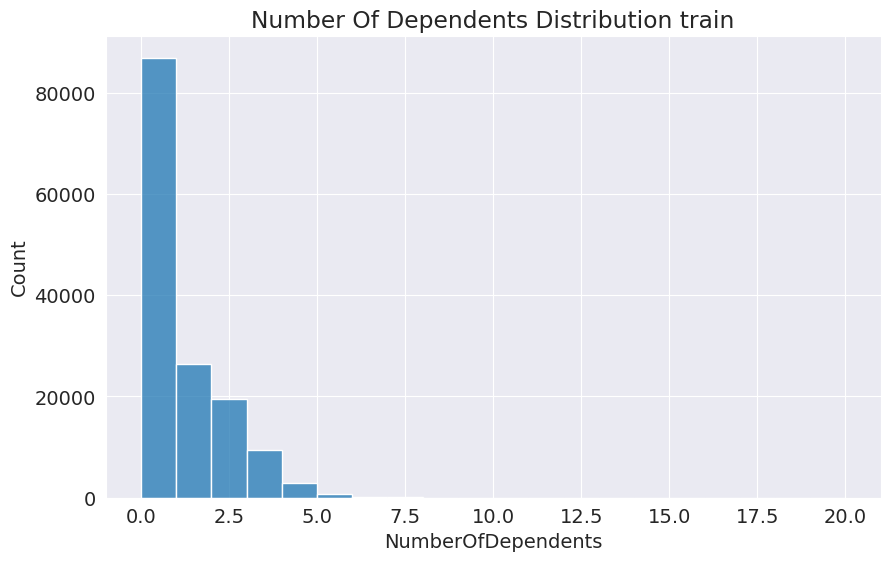

In [107]:
# Histogram
sns.histplot(data=train, x='NumberOfDependents', bins=20)
plt.title('Number Of Dependents Distribution train')
plt.show()

In [108]:
train['NumberOfDependents'].describe()

count   146076.000
mean         0.757
std          1.115
min          0.000
25%          0.000
50%          0.000
75%          1.000
max         20.000
Name: NumberOfDependents, dtype: float64

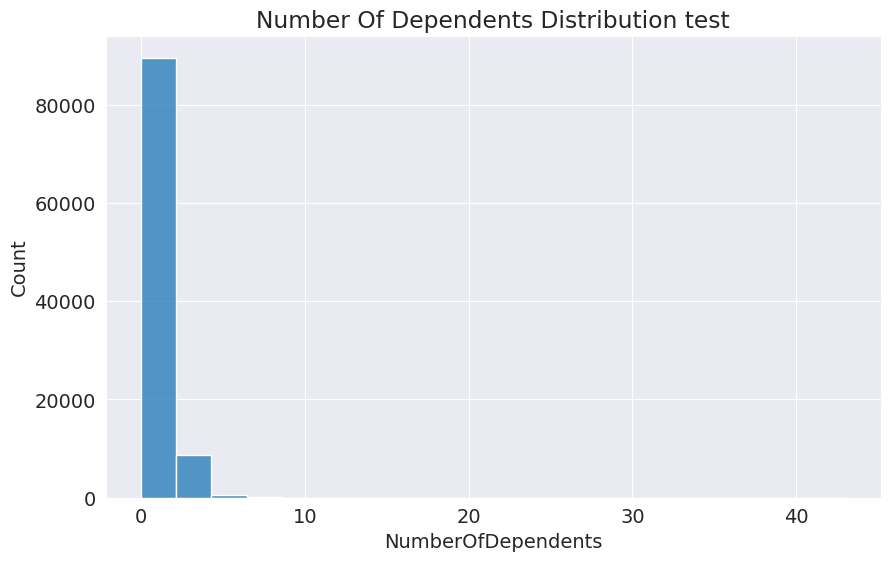

In [109]:
# Histogram
sns.histplot(data=test, x='NumberOfDependents', bins=20)
plt.title('Number Of Dependents Distribution test')
plt.show()

In [110]:
test['NumberOfDependents'].describe()

count   98877.000
mean        0.769
std         1.137
min         0.000
25%         0.000
50%         0.000
75%         1.000
max        43.000
Name: NumberOfDependents, dtype: float64

we can see that here too we have outliers, while 75% of the data seem to have of `1 dependant` the max of both train and test data seem to have `20` and `43` dependants, which in practical is not possible. Also i cant filter the test dataset thus again i'm gonna let the model figure it out. If that don't seem to work then i'll try to hard code the probabilities for these kind of anamolies.

# EDA SUMMARY

* if u read the metadata well, we can see that we have a really weird dataset. read further below to know more.

* to start-of we have a min age of `0` which is absurd also that was the only one value in the dataset. so i checked the min age on the test datset, where it is starting at 21. so that's the min age for these loans.

* `RevolvingUtilizationOfUnsecuredLines` this seems weird too. as per the description it said the total balance to the sum of available credit limits. Well, if u think the credit limit should be the greater number as that is the maximum a person caan spend. For example if the credit limit is 100 and the person spends 70 then the utilisation will be 0.7. Thus the utilisation will be under 1 unless the person spends utilises all the available credit then it'll be 1 but it can't exceed 1. you can say the person can be spending from his savings and that would result the utilisation being more than 1. Yes, it can be true but the banks will not have access to the spending from his savings. If somehow they coul track then the data here seems reasonable to some extent. cause an utilisation of `50708` is 50000 times the available credit limit which can't be possible and if that's true then that person has some serious financial probelms that he will default on any loan for sure the probability is 100%. I see these kind of values as outliers as from the stats above 75% of the values lie below 1. I could have filtered it but see the `test` dataset its the same here too `21821` utilisation. Thus, if i would have filtered it then the model will not get trained for these kind of scenarios. Also i can't filter the test dataset. But in real life these could hve been some data entry error or some serious cases that would need special attention.

* `NumberOfTime30-59DaysPastDueNotWorse`,`NumberOfTimes90DaysLate`,`NumberOfTime60-89DaysPastDueNotWorse` these columns are just a single feature that has been split into multiple sections of the timeline. Thus can see the very similar distribution of data and very high coorealtion.

* Another controversial column is `DebtRatio` the description says _Monthly debt payments, alimony,living costs divided by monthy gross income_. This is so similar to the utilisation we saw above. For example if the income is 100 and the monthly spends is 70 then the DebtRatio will be 0.7. Thus the utilisation will be under 1 unless the person have so much dept then it'll be 1 but it can't exceed 1 if it exceeds one then that person is in very bad financial situation and he'll surely default on the given loan with a probability of 100%. Idealy the monthly income should be more than the monthly spending and that's what's true to the 75% of the dataset which is under 1 while the max in the `train` data is `329664` which is impossible cause _that's 3.3 lakhs times higher than the monthly income_. Again i could filter this out as an outlier but see the stats of `test` data its same story there too, since i can't filter the test dataset i'm gonna train the model on these absured conditions so that it will know that these are absured conditions and act accordinly.

Interestingly found that whenever the `DebtRatio` is more than 1 with some impossible numbers the `MonthlyIncome` was $NAN$ i found this using `train[train['MonthlyIncome'].isnull()]` but again this is not completely true cause i found $NAN$ even when the `DebtRatio` is below 1. found that using this `train[(train['DebtRatio'] < 1) & (train['MonthlyIncome'].isna())]`

* Talking about `MonthlyIncome` then that data is another nightmare. we can see the min income is `0` that's not possible at all and how a bank will give loan to a person having zero monthly income? the max value is `3008750` which is 3million, who in the world with a monthly income of `3million` and still needs a loan? okay maybe we'll consider as a businessman but 75% of the monthly income in the dataset remains under 10K so, i filtered the dataset using `train[(train['MonthlyIncome'] >100000)]` so i checked for those as well using the conditions that DebtRatio and RevolvingUtilizationOfUnsecuredLines higher than 1 and very high 'MonthlyIncome' to a relief we don't seem to have this kind of complication. but Surprise, Surprise we have another condition where the DebtRatio seems so high but the MonthlyIncome is missing and it like someone accidentaly put the monthly income in the debtratio colum. but again this is not completely true cause i found 𝑁𝐴𝑁 even when the DebtRatio is below 1. To simply put i couln't arrive at an realationship between `DebtRatio` and `MonthlyIncome` this worsen with the missing data and the same trend follows in the test dataset too. Thus i'm im leaving these ulaltered for the ML model to learn these anmolies for better predictions.

* As per the description 'Number Of Open Credit Lines And Loans' means _Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)_. Looking at the distribution both train and test sets have identical distribution with same kind of outliers. people are having `58` in that i dont know how much are source of income and how much are the loans. In reallife a detailed investigation will be required in these kind of cases and if not enough info is obtained then banks wont give loans as the probability of defaulting is very high. But if they have good `MonthlyIncome` then this can be possible. we can see that people having `MonthlyIncome` less than 10k still having many sources of other income and loans and still managed not to default on the loan. As i said before this is `not enough data` situation and since the test data follows a similar pattern again i wont filter the train data and leave it to the model to train and figure it out.

* we can see that here too we have outliers, while 75% of the data seem to have of `1 dependant` the max of both train and test data seem to have `20` and `43` dependants, which in practical is not possible. Also i cant filter the test dataset thus again i'm gonna let the model figure it out. If that don't seem to work then i'll try to hard code the probabilities for these kind of anamolies.

# Class Imbalance

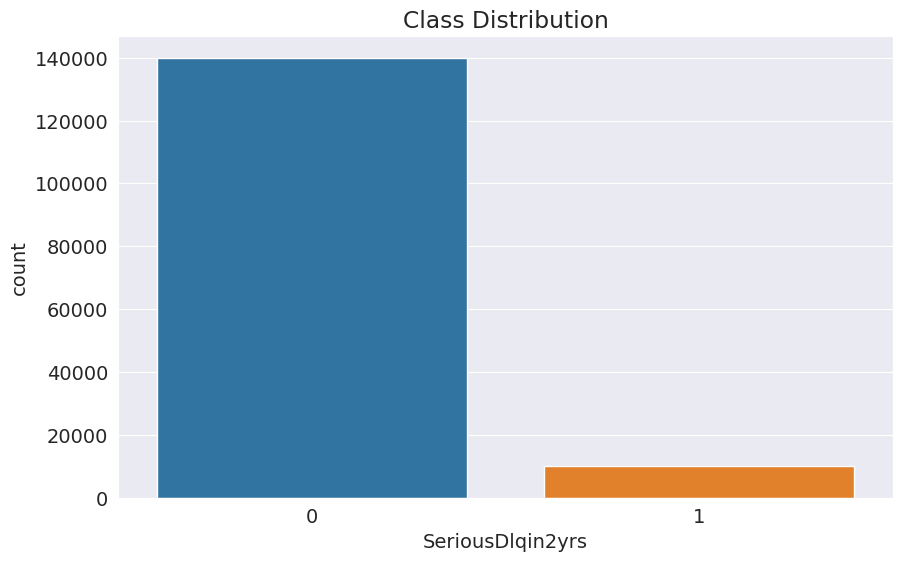

In [112]:
# Countplot
sns.countplot(x='SeriousDlqin2yrs', data=train)
plt.title('Class Distribution')
plt.show()

Having majority of the data on one side is huge problem as it will become a bias for the model. Read the below explanation:

Class imbalance refers to a situation in a classification problem where the distribution of classes in the target variable is heavily skewed. In other words, one class has significantly more samples than the other class(es), resulting in an imbalanced dataset. For example, if you have a binary classification problem with 90% of the samples belonging to class A and only 10% belonging to class B, it represents a class imbalance.

Class imbalance can have several implications on the machine learning model's performance and training process:

1. Bias: The model tends to be biased towards the majority class since it has more samples to learn from. It may struggle to capture the patterns and characteristics of the minority class.

2. Poor generalization: The model may have a poor ability to generalize and predict the minority class accurately. It may prioritize predicting the majority class, leading to low precision, recall, and F1-score for the minority class.

3. Evaluation metrics: Accuracy alone is not a reliable evaluation metric for imbalanced datasets. It can be misleading because even if the model predicts only the majority class, it will have high accuracy due to the class imbalance. Therefore, other evaluation metrics like precision, recall, F1-score, and area under the ROC curve (AUC-ROC) are more suitable for assessing the model's performance.

To address class imbalance, there are several remedies you can consider:

1. Resampling techniques: This involves either oversampling the minority class or undersampling the majority class to create a balanced dataset. Oversampling methods include techniques like random oversampling, SMOTE (Synthetic Minority Over-sampling Technique), and ADASYN (Adaptive Synthetic Sampling). Undersampling methods include random undersampling and cluster-based undersampling.

2. Data augmentation: For imbalanced datasets, you can apply data augmentation techniques specifically targeted at the minority class to increase its representation. This can involve generating synthetic samples or applying transformations to the existing samples.

3. Algorithmic techniques: Certain algorithms are inherently capable of handling class imbalance. For example, decision tree-based algorithms like Random Forest and Gradient Boosting can perform well on imbalanced datasets. These algorithms can learn from the minority class by adjusting their splitting criteria.

4. Class weights: Many machine learning algorithms allow you to assign different weights to different classes. By giving higher weights to the minority class, you can make the model pay more attention to it during training.

5. Anomaly detection: If the minority class represents anomalies or rare events, consider treating it as an anomaly detection problem rather than a standard classification problem. This involves using techniques like One-class SVM or Isolation Forest to identify and classify rare instances.

It's important to note that the choice of the remedy depends on the specific characteristics of your dataset, the imbalance level, and the algorithm you are using. It's advisable to experiment with different approaches and evaluate their performance using appropriate metrics to find the most suitable solution for your problem.

read more about the techniques here https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

### _Lucikly the model i created seems to do well in the absence of all these techniques. Maybe in the future or in the end of the notebook as a part of experimentation i would try to impliment:_
#### * Removing or adjusting outliers/hardcoding the probabilty myself for absurd values in the dataset.
#### * Address the Class Imbalance issue with proper solutions and then create a new model.

# Modelling

# DUMB MODEL

creating baseline or dumb models will act as a benchmark to improve upon. Since this is a class imbalanced dataset with high propotion of `0` so i'm gonna create a dumb model that will always predict `0` i.e the loan was never defaulted by anybody.

In [113]:
from sklearn.model_selection import train_test_split
df=train.dropna()
X=df.iloc[:,2:]
y=df.SeriousDlqin2yrs

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

def all_no(inputs):
    return np.full(len(inputs), 0)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,all_no(X_test))

0.9306560239461212

See the all_no model gets 93% accuracy this means that 93% percent of our data is skwed to 'no' on loan default. This is the problem with the class imbalanced dataset. Also we can see we did nothing yet we achived 93% accuracy. this is why the evaluation using the `Prediction Probabilites` rather than the actual Predictions

# BASELINE MODELs

Baseline models are used to create the actual baselines for us to improve upon. Unlike before we are gonna predict the probabilities rather than actual Probabilites itself. This way we can get a clear picture of what we can expect, were are we standing in prediction and what we should improve upon.

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict probabilities instead of class labels
y_pred_prob = model.predict_proba(X_test)

# Get the probabilities for the positive class (class 1)
positive_probabilities = y_pred_prob[:, 1]

# You can then compare these probabilities or perform any other desired operations

# For example, calculate the accuracy based on probability thresholds
threshold = 0.5
y_pred = (positive_probabilities >= threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9306837393642083


We can see the similar accuracy as the dumb model. We actually test the accuracy on the `prediction probabilities` even that yielded the same 93% accuracy. Thus a more complex model like `XGBoost` is the next model i'm gonna use.

# Preparing Data for Modelling

In [118]:
train=train.iloc[:,1:] # This selectes the required data for modelling.
train=train[train['age']>=21] # This filters the age to start from 21 as we saw the outliers on training dataset.
test=test.iloc[:,2:] # This selectes the required data in the test dataset for modelling.

# Below are additional outliers filtering to match the test dataset but it yielded in poor accuracy. But feel free to experiment
#train=train[train['RevolvingUtilizationOfUnsecuredLines']<=21821.000]
#train=train[train['DebtRatio']<=268326.000]

# Selecting Input and Target Columns

Selecting required columns for training and testing the model. Let's select the columns that we'll use for training. Since we modified several columsn through feature engineering we have to either delete the old columns or filter the dataset wih only necessay and modified columns. The later method is what i'm gonna use also it is pretty handy. Refer [HERE](https://www.kaggle.com/code/sridharstreaks/decision-trees-intution-model-building?scriptVersionId=127577600&cellId=35).

In [119]:
train.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [120]:
input_cols=['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']
target_cols='SeriousDlqin2yrs'

Creating new datasets for modeeling with the above selected columns. Below i'm using a method by which:

* I'll create a list of column names extracted from my source dataset like `list(dataset_name.columns)` . This will create a list of column names I wish to extract.
* Now i can store this list in some value like `name_of_list`. Then i can use this stored list of column names to act like a filter on any dataset that contains similar column names. This is actually usefull that you don't have to modify the dataframe each time.

In [121]:
# These are the filterted new datasets prepared for modeeling.
train_inputs=train[input_cols]
train_targets=train[target_cols]
test_inputs=test[input_cols]

# Scaling Numerical Features.

In machine learning, scaling numerical features is the process of transforming numerical data so that it falls within a specific range. This is important because it can help improve the performance of certain machine learning algorithms. Some of the most commonly used scaling techniques are min-max scaling, mean normalization, and standardization.

Scaling numerical features is important because many machine learning algorithms work better when the features are on a similar scale. This is because algorithms like linear regression and K-nearest neighbors use distance measures to compare features, and when the features are on vastly different scales, this can cause problems. Additionally, scaling can help to speed up the convergence of some optimization algorithms used in machine learning.

Another reason why scaling numerical features is important is that some features may have very different variances or ranges, which can cause them to dominate the objective function of the machine learning algorithm. This can lead to biased results, where certain features have a much larger influence on the outcome than others. By scaling the features, we can avoid this problem.

There are several methods by which we can scale the numerical features and it also depends on various factors like type of data we have, do we have outliers, do we wanna scale including negative scales etc. I'll link a article to know more about which scaler to use when [HERE](https://towardsdatascience.com/feature-scaling-effect-of-different-scikit-learn-scalers-deep-dive-8dec775d4946).

Here i'm gonna use `RobustScaler`. I've tested almost all the available scalers and this `stock RobustScaler` is one that perfoms the best. RobustScaler works best when we have data filled with outliers which is what we exactly have. read more about RobustScaler [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html).

In [122]:
train_inputs.describe().loc[['min','max']] # Before scaling

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,0.000,21.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,50708.000,109.000,98.000,329664.000,3008750.000,58.000,98.000,54.000,98.000,20.000


In [123]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()

scaler.fit(train_inputs[input_cols])
train_inputs[input_cols]=scaler.transform(train_inputs[input_cols])
test_inputs[input_cols]=scaler.transform(test_inputs[input_cols])

/tmp/ipykernel_34/479071550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[input_cols]=scaler.transform(train_inputs[input_cols])


In [124]:
train_inputs.describe().loc[['min','max']] #after scaling

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
min,-0.291,-1.409,0.000,-0.529,-1.114,-1.333,0.000,-0.500,0.000,0.000
max,95824.009,2.591,98.000,475579.256,619.375,8.333,98.000,26.500,98.000,20.000


# Imputing

Imputing missing data is the process of filling in missing values in a dataset with estimated values. Missing data can arise due to a variety of reasons such as data entry errors, sensor malfunction, or simply the lack of information. Missing data can be problematic as it can lead to biased or inefficient analysis, and sometimes make the data unusable altogether.

There are several methods for imputing missing data, including mean imputation, mode imputation, regression imputation, and multiple imputation. Mean imputation involves replacing missing values with the mean value of the non-missing values for that variable. Mode imputation is similar, but replaces missing values with the most common value for that variable. Regression imputation involves using a regression model to predict the missing values based on other variables in the dataset. Multiple imputation involves creating multiple imputed datasets and combining the results to create a final dataset.

The choice of imputation method depends on the nature of the missing data and the goals of the analysis. Regardless of the method used, it is important to carefully consider the potential impact of imputing missing data on the results of the analysis and to report any imputation methods used in the final analysis.

let's first check the amount of missing data in train and test dataset

In [126]:
train_inputs.isna().sum(),test_inputs.isna().sum()

(RevolvingUtilizationOfUnsecuredLines        0
 age                                         0
 NumberOfTime30-59DaysPastDueNotWorse        0
 DebtRatio                                   0
 MonthlyIncome                           29731
 NumberOfOpenCreditLinesAndLoans             0
 NumberOfTimes90DaysLate                     0
 NumberRealEstateLoansOrLines                0
 NumberOfTime60-89DaysPastDueNotWorse        0
 NumberOfDependents                       3924
 dtype: int64,
 RevolvingUtilizationOfUnsecuredLines        0
 age                                         0
 NumberOfTime30-59DaysPastDueNotWorse        0
 DebtRatio                                   0
 MonthlyIncome                           20103
 NumberOfOpenCreditLinesAndLoans             0
 NumberOfTimes90DaysLate                     0
 NumberRealEstateLoansOrLines                0
 NumberOfTime60-89DaysPastDueNotWorse        0
 NumberOfDependents                       2626
 dtype: int64)

As you can see we have quite number of missing data in both the dataset. Siilar to the scaling methods here too i tried different imputation methods but `stock iterativeimputer` works the best for me. You can read more about Iterative Imputer [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html).

In [127]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
train_inputs[input_cols] = imputer.fit_transform(train_inputs[input_cols])
test_inputs[input_cols] = imputer.fit_transform(test_inputs[input_cols])

/tmp/ipykernel_34/3495720942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_inputs[input_cols] = imputer.fit_transform(train_inputs[input_cols])


In [128]:
train_inputs.isna().sum(),test_inputs.isna().sum()

(RevolvingUtilizationOfUnsecuredLines    0
 age                                     0
 NumberOfTime30-59DaysPastDueNotWorse    0
 DebtRatio                               0
 MonthlyIncome                           0
 NumberOfOpenCreditLinesAndLoans         0
 NumberOfTimes90DaysLate                 0
 NumberRealEstateLoansOrLines            0
 NumberOfTime60-89DaysPastDueNotWorse    0
 NumberOfDependents                      0
 dtype: int64,
 RevolvingUtilizationOfUnsecuredLines    0
 age                                     0
 NumberOfTime30-59DaysPastDueNotWorse    0
 DebtRatio                               0
 MonthlyIncome                           0
 NumberOfOpenCreditLinesAndLoans         0
 NumberOfTimes90DaysLate                 0
 NumberRealEstateLoansOrLines            0
 NumberOfTime60-89DaysPastDueNotWorse    0
 NumberOfDependents                      0
 dtype: int64)

# XBG Final Modelling

This is the model that yielded the best accuracy for me. feel free to experiment with different other models. You can read a detailed notebooks on XGboost in one of my previous [Notebook](https://www.kaggle.com/code/sridharstreaks/gbms-with-xgboost-intution-model-building?scriptVersionId=129394609&cellId=103).

Also `Hyperparameter` tuning helped me to futher increase the accuracy score. after doing trial and error using different parameters below are the parameters that gave me the best accuracy score. **We'll i can train more complex model to squeeze slight increase in accuracies but that'll consume a lot of computing power. this is were the term `efficiency` comes in. Optimal use of the resources is always recommended.**

You can read more about `hyperparameter tuning` in my previous notebooks [HERE](https://www.kaggle.com/code/sridharstreaks/gbms-with-xgboost-intution-model-building?scriptVersionId=129394609&cellId=137) and [HERE](https://www.kaggle.com/code/sridharstreaks/gbms-with-xgboost-intution-model-building?scriptVersionId=129394609&cellId=163).

In [129]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_targets , test_size=0.2, random_state=42)

# Creating the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Defining the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Training the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Making predictions on the test set
y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.67%


Well, this is again similar to the `dumb` and `baseline` models but this is more generalised model that it predicted with a good accuracy on the `test` dataset. As said before even more complec model can be created. feel free to explore and experiment. i'll try to add more some more models addressning the outliers and class imbalance in future versions of the notebook.

In [130]:
dtest_inputs = xgb.DMatrix(test_inputs)
probs=model.predict(dtest_inputs)
probs

array([0.0801754 , 0.05575221, 0.01286422, ..., 0.00615143, 0.07748079,
       0.05243172], dtype=float32)

# Creating Submission

In [131]:
submission['Probability'] = probs.tolist() #this puts the above predicted probability onto the submission file.
submission

,Id,Probability
0,1,0.080
1,2,0.056
2,3,0.013
3,4,0.071
4,5,0.100
...,...,...
101498,101499,0.030
101499,101500,0.352
101500,101501,0.006
101501,101502,0.077


These are the probabilities my model predicted on the test dataset, which i then downloaded using the code below, submitted and received the score.

In [ ]:
from IPython.display import display, FileLink #This createds downloable submission.csv file.
submission.to_csv('submission_xgb.csv',index=False) #i'm not gonna run this as i already submittied the csv file and recieved the score.
display(FileLink('submission_xgb.csv'))

# This submission achieves a position of `173` out of **924** teams in the private leaderboard with a score of `0.86594`